# Question 1

In [1]:
import pandas as pd

# Step 1: Import necessary libraries and data
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users_data = pd.read_csv(url, sep="|")

# Step 2: Calculate the average age per occupation
average_age_by_occupation = users_data.groupby("occupation")["age"].mean()

# Step 3: Calculate the ratio of males in each occupation, sort in descending order
def calculate_male_ratio(group):
    male_count = (group['gender'] == 'M').sum()
    total_count = group['gender'].count()
    return male_count / total_count

male_ratio_by_occupation = users_data.groupby("occupation").apply(calculate_male_ratio)
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)

# Step 4: Determine the range of ages (minimum and maximum) for each occupation
age_range_by_occupation = users_data.groupby("occupation")["age"].agg(['min', 'max'])

# Step 5: Calculate the average age per occupation and gender combination
average_age_by_occupation_gender = users_data.groupby(["occupation", "gender"])["age"].mean()

# Step 6: Calculate the percentage of women and men in each occupation
def calculate_gender_percentage(group):
    total_count = group['gender'].count()
    female_count = (group['gender'] == 'F').sum()
    male_count = total_count - female_count
    return {
        'female_percentage': (female_count / total_count) * 100,
        'male_percentage': (male_count / total_count) * 100
    }

gender_percentage_by_occupation = users_data.groupby("occupation").apply(calculate_gender_percentage)

# Display the results
print("Average Age per Occupation:")
print(average_age_by_occupation)
print("\nMale Ratio per Occupation (sorted):")
print(male_ratio_by_occupation)
print("\nAge Range per Occupation:")
print(age_range_by_occupation)
print("\nAverage Age per Occupation and Gender:")
print(average_age_by_occupation_gender.unstack())
print("\nPercentage of Women and Men per Occupation:")
print(gender_percentage_by_occupation)


Average Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation (sorted):
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other   

# Question 2

In [2]:
import pandas as pd

# Step 1: Import required libraries and load the Euro 2012 dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro_data = pd.read_csv(url)

# Step 2: Extract the 'Goals' column
goals_scored = euro_data["Goals"]

# Step 3: Count the unique number of participating teams
unique_teams_count = euro_data["Team"].nunique()

# Step 4: Calculate the total number of columns in the dataset
total_columns = euro_data.shape[1]

# Step 5: Create a subset DataFrame with specific columns
disciplinary_actions = euro_data[["Team", "Yellow Cards", "Red Cards"]]

# Step 6: Sort the teams based on Red Cards and then on Yellow Cards
disciplinary_sorted = disciplinary_actions.sort_values(by=["Red Cards", "Yellow Cards"])

# Step 7: Calculate the average Yellow Cards per team
avg_yellow_cards = disciplinary_actions["Yellow Cards"].mean()

# Step 8: Identify teams that scored more than 6 goals
high_scoring_teams = euro_data[euro_data["Goals"] > 6]

# Step 9: Select teams whose names start with 'G'
teams_with_G = euro_data[euro_data["Team"].str.startswith("G")]

# Step 10: Select the first 7 columns of the dataset
first_seven_cols = euro_data.iloc[:, :7]

# Step 11: Select all columns except the last 3
all_except_last_three_cols = euro_data.iloc[:, :-3]

# Step 12: Extract Shooting Accuracy for specific countries
shooting_accuracy_selected = euro_data.loc[euro_data["Team"].isin(["England", "Italy", "Russia"]), ["Team", "Shooting Accuracy"]]

# Display the results
print("Number of teams participating:", unique_teams_count)
print("Total number of columns:", total_columns)
print("\nDisciplinary Actions DataFrame:")
print(disciplinary_actions)
print("\nDisciplinary Actions DataFrame (sorted):")
print(disciplinary_sorted)
print("\nAverage Yellow Cards per Team:", avg_yellow_cards)
print("\nHigh-Scoring Teams:")
print(high_scoring_teams)
print("\nTeams starting with 'G':")
print(teams_with_G)
print("\nFirst 7 columns of the dataset:")
print(first_seven_cols)
print("\nAll columns except the last 3:")
print(all_except_last_three_cols)
print("\nShooting Accuracy for England, Italy, and Russia:")
print(shooting_accuracy_selected)


Number of teams participating: 16
Total number of columns: 35

Disciplinary Actions DataFrame:
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0

Disciplinary Actions DataFrame (sorted):
                   Team  Yello

# Question 3

In [3]:

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create three Series with random data
bedroom_series = pd.Series(np.random.randint(1, 5, size=100))
bathroom_series = pd.Series(np.random.randint(1, 4, size=100))
price_series = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3: Combine the Series into a DataFrame
data_frame = pd.DataFrame({'bedrooms': bedroom_series, 'bathrooms': bathroom_series, 'price_per_square_meter': price_series})

# Step 4: Rename the columns of the DataFrame
data_frame.columns = ['bedrooms', 'bathrooms', 'price_per_square_meter']

# Step 5: Combine the Series into a single DataFrame column
combined_column = pd.DataFrame(pd.concat([bedroom_series, bathroom_series, price_series], ignore_index=True))

# Step 6: Check if 'combined_column' index goes up to 99
is_index_max_99_before = combined_column.index.max() == 99
print("Is it true that 'combined_column' goes only up to index 99?", is_index_max_99_before)

# Step 7: Reset the index of 'combined_column'
combined_column.reset_index(drop=True, inplace=True)

# Verify the reindexing
is_index_max_299_after = combined_column.index.max() == 299
print("Is it true after reindexing?", is_index_max_299_after)


Is it true that 'combined_column' goes only up to index 99? False
Is it true after reindexing? True


# Question 4

In [4]:
import pandas as pd
import numpy as np

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Import the dataset
data = pd.read_csv('wind.txt', delim_whitespace=True, na_values='NaN')

# Step 3: Convert date columns and set proper datetime index
data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).apply('-'.join, axis=1))
data = data.set_index('date')
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)

# Step 4: Define a function to correct the year and apply it
def fix_year(year):
    if year > 1989:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

# Step 5: Set the correct dates as the index
data.index = pd.to_datetime(data.index)

# Step 6: Count missing values for each location
missing_values_per_location = data.isnull().sum()

# Step 7: Calculate the total count of non-missing values
total_non_missing_count = data.count().sum()

# Step 8: Compute the mean windspeed over all locations and times
average_windspeed = data.mean().mean()

# Step 9: Create a DataFrame with location statistics
location_statistics = pd.DataFrame({
    'minimum': data.min(),
    'maximum': data.max(),
    'mean': data.mean(),
    'standard_deviation': data.std()
})

# Step 10: Create a DataFrame with daily statistics
daily_statistics = pd.DataFrame({
    'minimum': data.min(axis=1),
    'maximum': data.max(axis=1),
    'mean': data.mean(axis=1),
    'standard_deviation': data.std(axis=1)
})

# Step 11: Find average windspeed in January for each location
average_windspeed_january = data[data.index.month == 1].mean()

# Step 12: Resample data to yearly frequency for each location
yearly_resampled_data = data.resample('Y').mean()

# Step 13: Resample data to monthly frequency for each location
monthly_resampled_data = data.resample('M').mean()

# Step 14: Resample data to weekly frequency for each location
weekly_resampled_data = data.resample('W').mean()

# Step 15: Calculate weekly statistics using rolling window
weekly_statistics = weekly_resampled_data.rolling(window=7).agg(['min', 'max', 'mean', 'std']).dropna()

# Display results
print("Missing values per location:\n", missing_values_per_location)
print("Total count of non-missing values:", total_non_missing_count)
print("Average windspeed over all locations and times:", average_windspeed)
print("Location statistics:\n", location_statistics)
print("Daily statistics:\n", daily_statistics)
print("Average windspeed in January for each location:\n", average_windspeed_january)
print("Yearly resampled data:\n", yearly_resampled_data)
print("Monthly resampled data:\n", monthly_resampled_data)
print("Weekly resampled data:\n", weekly_resampled_data)
print("Weekly statistics:\n", weekly_statistics)


Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
Total count of non-missing values: 78857
Average windspeed over all locations and times: 10.227982360836924
Location statistics:
      minimum  maximum       mean  standard_deviation
RPT     0.67    35.80  12.362987            5.618413
VAL     0.21    33.37  10.644314            5.267356
ROS     1.50    33.84  11.660526            5.008450
KIL     0.00    28.46   6.306468            3.605811
SHA     0.13    37.54  10.455834            4.936125
BIR     0.00    26.16   7.092254            3.968683
DUB     0.00    30.37   9.797343            4.977555
CLA     0.00    31.08   8.495053            4.499449
MUL     0.00    25.88   8.493590            4.166872
CLO     0.04    28.21   8.707332            4.503954
BEL     0.13    42.38  13.121007            5.835037
MAL     0.67    42.54  15.599079            6.699794
Daily statistics:
            

# Question 5

In [5]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Import the dataset from the chipotle.tsv file
chipotle_data = pd.read_csv('chipotle.tsv', sep='\t')

# Step 3: Assign it to a variable called chipotle_data

# Step 4: Display the first 10 entries
print(chipotle_data.head(10))

# Step 5: Calculate the number of observations in the dataset
num_records = len(chipotle_data)
print("Number of records:", num_records)

# Step 6: Calculate the number of columns in the dataset
num_columns = len(chipotle_data.columns)
print("Number of columns:", num_columns)

# Step 7: Display the names of all the columns
print("Column names:", chipotle_data.columns.tolist())

# Step 8: Display the type of indexing used in the dataset
print("Indexing type:", chipotle_data.index)

# Step 9: Identify the most frequently ordered item
most_frequent_item = chipotle_data['item_name'].value_counts().idxmax()
print("Most frequently ordered item:", most_frequent_item)

# Step 10: Calculate the total quantity ordered for the most frequent item
most_frequent_item_quantity = chipotle_data[chipotle_data['item_name'] == most_frequent_item]['quantity'].sum()
print("Total quantity ordered for the most frequent item:", most_frequent_item_quantity)

# Step 11: Identify the most ordered item in the choice_description column
most_ordered_choice = chipotle_data['choice_description'].value_counts().idxmax()
print("Most ordered choice description:", most_ordered_choice)

# Step 12: Calculate the total number of items ordered
total_ordered_items = chipotle_data['quantity'].sum()
print("Total ordered items:", total_ordered_items)

# Step 13:
# Convert the item price to a floating-point number
chipotle_data['item_price'] = chipotle_data['item_price'].apply(lambda x: float(x[1:]))

# Check the data type of item price
print("Item price data type:", chipotle_data['item_price'].dtype)

# Step 14: Calculate the total revenue for the period in the dataset
total_revenue = (chipotle_data['quantity'] * chipotle_data['item_price']).sum()
print("Total revenue:", total_revenue)

# Step 15: Calculate the number of orders made in the period
num_orders = chipotle_data['order_id'].nunique()
print("Number of orders:", num_orders)

# Step 16: Calculate the average revenue amount per order
average_revenue_per_order = total_revenue / num_orders
print("Average revenue per order:", average_revenue_per_order)

# Step 17: Calculate the number of different items sold
num_different_items = chipotle_data['item_name'].nunique()
print("Number of different items sold:", num_different_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question 6

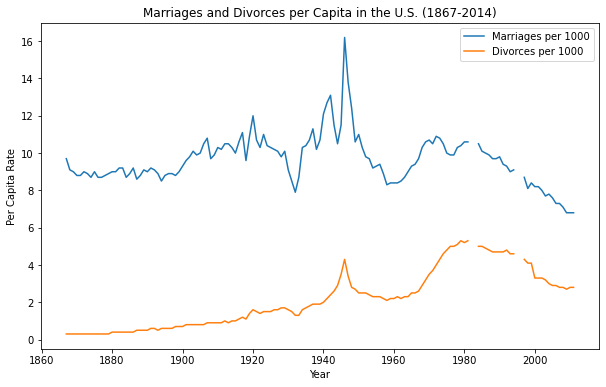

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import the dataset from the us-marriages-divorces-1867-2014.csv file
marriages_divorces_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Step 3: Create a line plot to visualize marriages and divorces per capita
plt.figure(figsize=(10, 6))

# Plot marriages per capita
plt.plot(marriages_divorces_data['Year'], marriages_divorces_data['Marriages_per_1000'], label='Marriages per 1000')

# Plot divorces per capita
plt.plot(marriages_divorces_data['Year'], marriages_divorces_data['Divorces_per_1000'], label='Divorces per 1000')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Add legend
plt.legend()

# Show the plot
plt.show()


# Question 7

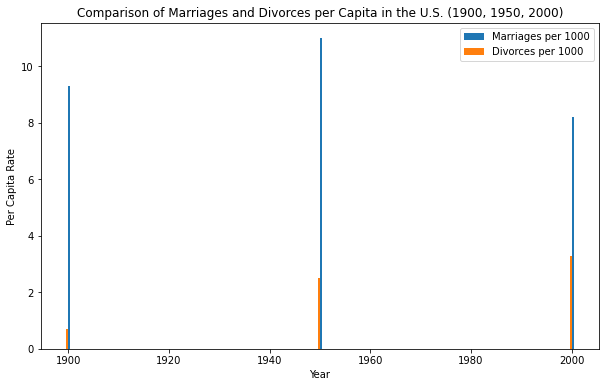

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import the dataset from the us-marriages-divorces-1867-2014.csv file
marriages_divorces_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Filter data for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
filtered_data = marriages_divorces_data[marriages_divorces_data['Year'].isin(selected_years)]

# Step 3: Create a vertical bar chart to compare marriages and divorces per capita
plt.figure(figsize=(10, 6))

# Plot marriages and divorces per capita for the selected years
plt.bar(filtered_data['Year'], filtered_data['Marriages_per_1000'], width=0.4, align='edge', label='Marriages per 1000')
plt.bar(filtered_data['Year'], filtered_data['Divorces_per_1000'], width=-0.4, align='edge', label='Divorces per 1000')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

# Add legend
plt.legend()

# Show the plot
plt.show()


# Question 8

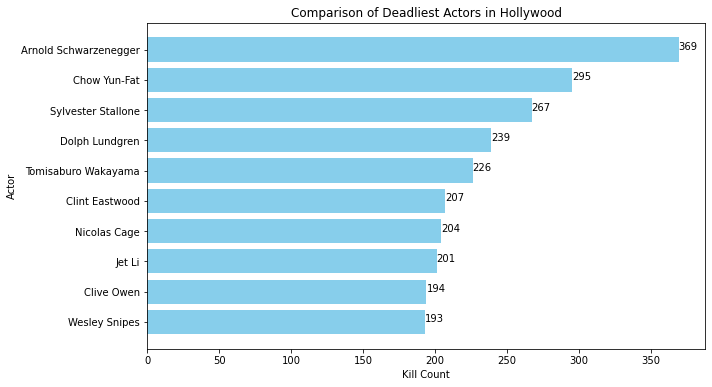

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import the dataset from the actor_kill_counts.csv file
kill_counts_data = pd.read_csv('actor_kill_counts.csv')

# Step 3: Sort the data by kill count in ascending order
sorted_kill_counts = kill_counts_data.sort_values(by='Count', ascending=True)

# Step 4: Create a horizontal bar chart to compare deadliest actors
plt.figure(figsize=(10, 6))

# Plot horizontal bars with actor names and kill counts
plt.barh(sorted_kill_counts['Actor'], sorted_kill_counts['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Comparison of Deadliest Actors in Hollywood')

# Display kill counts on each bar
for index, value in enumerate(sorted_kill_counts['Count']):
    plt.text(value, index, str(value))

# Show the plot
plt.show()


# Question 9

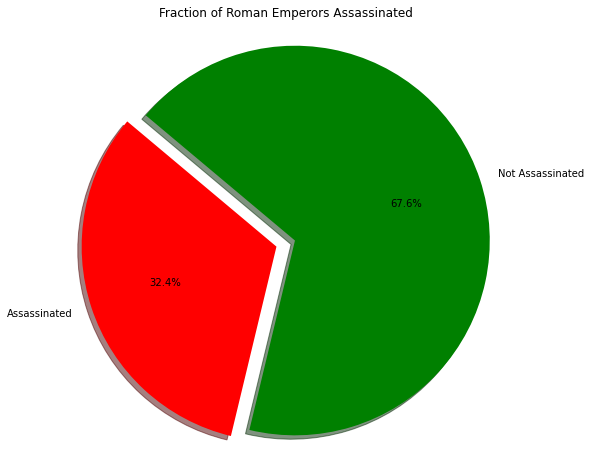

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import the dataset from the roman-emperor-reigns.csv file
emperor_data = pd.read_csv('roman-emperor-reigns.csv')

# Step 3: Calculate the count of emperors assassinated and not assassinated
assassinated_emperors_count = emperor_data[emperor_data['Cause_of_Death'].str.contains('Assassinated')].shape[0]
not_assassinated_emperors_count = emperor_data.shape[0] - assassinated_emperors_count

# Step 4: Create a pie chart to show the fraction of assassinated and not assassinated emperors
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_emperors_count, not_assassinated_emperors_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the first slice (Assassinated)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Ensure an equal aspect ratio for a circular pie
plt.axis('equal')

# Add a title to the pie chart
plt.title('Fraction of Roman Emperors Assassinated')

# Display the pie chart
plt.show()


# Question 10

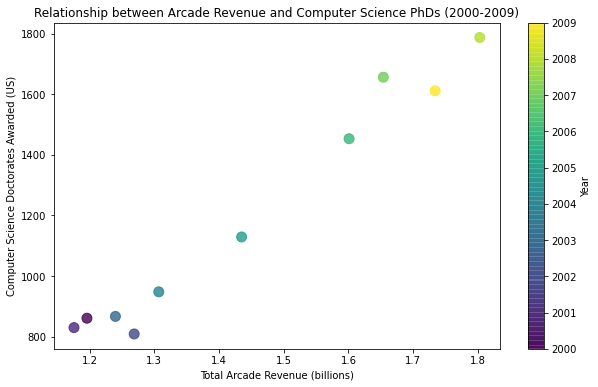

In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import the dataset from the arcade-revenue-vs-cs-doctorates.csv file
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Step 3: Create a scatter plot to visualize the relationship between Arcade Revenue and CS Doctorates
plt.figure(figsize=(10, 6))

# Plot scatter plot with colored dots based on year
plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
            c=data['Year'], cmap='viridis', s=100, alpha=0.8)

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')

# Add colorbar to indicate years
colorbar = plt.colorbar()
colorbar.set_label('Year')

# Show the plot
plt.show()
